# Reading .tif files

In [1]:
#! pip install rasterio
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

In [2]:
! pwd

/Users/mayajanvier


# Elevation 

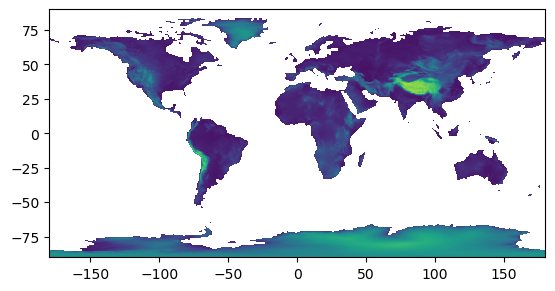

<Axes: >

In [3]:
fp = r'/Users/mayajanvier/Desktop/Agriculture/wc2.1_10m_elev.tif'
img = rasterio.open(fp)
show(img)

In [4]:
array = img.read()
array

array([[[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [  2731,   2874,   2873, ...,   2876,   2875,   2587],
        [  2654,   2794,   2793, ...,   2794,   2794,   2514],
        [  2502,   2634,   2634, ...,   2634,   2634,   2371]]],
      dtype=int16)

In [5]:
array.shape

(1, 1080, 2160)

In [6]:
img

<open DatasetReader name='/Users/mayajanvier/Desktop/Agriculture/wc2.1_10m_elev.tif' mode='r'>

In [7]:
print(img.count)
print(img.height, img.width)

1
1080 2160


In [8]:
img.indexes

(1,)

In [9]:
print(img.transform)

| 0.17, 0.00,-180.00|
| 0.00,-0.17, 90.00|
| 0.00, 0.00, 1.00|


In [10]:
print(img.crs)

EPSG:4326


In [11]:
img.xy(1,2) # Get the coordinates x, y of a pixel at row, col.

(-179.58333333333334, 89.75)

In [12]:
img.index(-179.58333333333334, 89.75) # Get the (row, col) index of the pixel containing (x, y)

(1, 2)

# Bioclim var

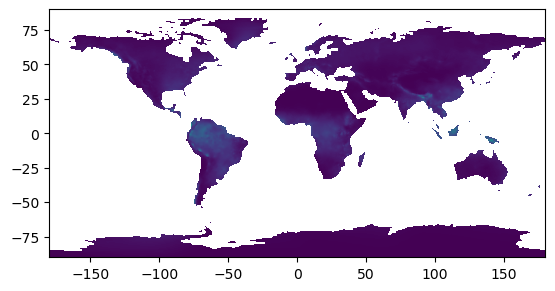

<Axes: >

In [13]:
fp = r'/Users/mayajanvier/Desktop/Agriculture/bioclim/wc2.1_10m_bio_12.tif'
pp = rasterio.open(fp)
show(pp)

In [14]:
pp_arr = pp.read()
pp_arr.shape

(1, 1080, 2160)

In [15]:
pp.xy(0,0)

(-179.91666666666666, 89.91666666666667)

In [16]:
pp_arr_geo = pp_arr[0]
pp_arr_geo

array([[-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38, -3.4e+38],
       [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38, -3.4e+38],
       [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38, -3.4e+38],
       ...,
       [ 4.0e+01,  3.8e+01,  3.9e+01, ...,  7.0e+00,  7.0e+00,  7.0e+00],
       [ 4.0e+01,  3.8e+01,  3.8e+01, ...,  6.0e+00,  7.0e+00,  6.0e+00],
       [ 4.3e+01,  4.0e+01,  4.0e+01, ...,  6.0e+00,  6.0e+00,  7.0e+00]],
      dtype=float32)

In [17]:
pp_arr_geo.shape

(1080, 2160)

In [18]:
pp_l_geo = pp_arr_geo.tolist()
len(pp_l_geo)

1080

In [19]:
len(pp_l_geo[0])

2160

In [20]:
pp_l_geo[1][1]

-3.3999999521443642e+38

In [21]:
for k in range(1080):
    for j in range(2160):
        lat, lon = pp.xy(k,j)
        pp_l_geo[k][j] = [pp_l_geo[k][j], lat, lon]
        

In [22]:
PP = np.array(pp_l_geo)

In [23]:
PP

array([[[-3.39999995e+38, -1.79916667e+02,  8.99166667e+01],
        [-3.39999995e+38, -1.79750000e+02,  8.99166667e+01],
        [-3.39999995e+38, -1.79583333e+02,  8.99166667e+01],
        ...,
        [-3.39999995e+38,  1.79583333e+02,  8.99166667e+01],
        [-3.39999995e+38,  1.79750000e+02,  8.99166667e+01],
        [-3.39999995e+38,  1.79916667e+02,  8.99166667e+01]],

       [[-3.39999995e+38, -1.79916667e+02,  8.97500000e+01],
        [-3.39999995e+38, -1.79750000e+02,  8.97500000e+01],
        [-3.39999995e+38, -1.79583333e+02,  8.97500000e+01],
        ...,
        [-3.39999995e+38,  1.79583333e+02,  8.97500000e+01],
        [-3.39999995e+38,  1.79750000e+02,  8.97500000e+01],
        [-3.39999995e+38,  1.79916667e+02,  8.97500000e+01]],

       [[-3.39999995e+38, -1.79916667e+02,  8.95833333e+01],
        [-3.39999995e+38, -1.79750000e+02,  8.95833333e+01],
        [-3.39999995e+38, -1.79583333e+02,  8.95833333e+01],
        ...,
        [-3.39999995e+38,  1.79583333e+02,

In [24]:
pp.xy(0,2)

(-179.58333333333334, 89.91666666666667)

In [25]:
pp.xy(0,1)

(-179.75, 89.91666666666667)

In [26]:
pp.xy(1,1)

(-179.75, 89.75)

In [89]:
pp.xy(2,1)

(-179.75, 89.58333333333333)

In [93]:
"""def add_coord(var):
    var_arr = var.read()[0]
    var_l = var_arr.tolist()
    for k in range(1080):
        for j in range(2160):
            lon, lat = var.xy(k,j)
            var_l[k][j] = [var_l[k][j], lon, lat]
    return np.array(var_l)

def save_file(name,array):
    np.save(f'/Users/mayajanvier/Desktop/Agriculture/var/{name}',array)"""
    

In [38]:
def get_coord(var):
    var_arr = var.read()[0]
    var_l = []
    for k in range(1080):
        for j in range(2160):
            lon, lat = var.xy(k,j)
            var_l.append([var_arr[k][j], lon, lat])
    return np.array(var_l)

def save_file(name,array):
    #np.savetxt(f'/Users/mayajanvier/Desktop/Agriculture/var/{name}.csv', array, delimiter=",")
    np.save(f'/Users/mayajanvier/Desktop/Agriculture/var/{name}',array)


In [36]:
ts = get_coord(pp).shape

In [37]:
ts

(2332800, 3)

In [33]:
save_file('test',np.array([1]))

# Convert all bio

In [39]:
ind ={1:'annual_temp',4:'temp_seasonality',5:'max_temp',6:'min_temp',12:'annual_pp',13:'max_pp',14:'min_pp',15:'pp_seasonality'}

In [40]:
for k in ind.keys():
    print(k)
    fp_var = f'/Users/mayajanvier/Desktop/Agriculture/bioclim/wc2.1_10m_bio_{k}.tif'
    var = rasterio.open(fp_var)
    #show(var)
    var_final = get_coord(var)
    save_file(ind[k],var_final)
    

1
4
5
6
12
13
14
15


In [41]:
fp = r'/Users/mayajanvier/Desktop/Agriculture/wc2.1_10m_elev.tif'
elev = rasterio.open(fp)
elev_final = get_coord(elev)
save_file('elevation',elev_final)

In [106]:
data = np.load('/Users/mayajanvier/Desktop/Agriculture/var/elevation.npy')
data

array([[[-32768.        ,   -179.91666667,     89.91666667],
        [-32768.        ,   -179.75      ,     89.91666667],
        [-32768.        ,   -179.58333333,     89.91666667],
        ...,
        [-32768.        ,    179.58333333,     89.91666667],
        [-32768.        ,    179.75      ,     89.91666667],
        [-32768.        ,    179.91666667,     89.91666667]],

       [[-32768.        ,   -179.91666667,     89.75      ],
        [-32768.        ,   -179.75      ,     89.75      ],
        [-32768.        ,   -179.58333333,     89.75      ],
        ...,
        [-32768.        ,    179.58333333,     89.75      ],
        [-32768.        ,    179.75      ,     89.75      ],
        [-32768.        ,    179.91666667,     89.75      ]],

       [[-32768.        ,   -179.91666667,     89.58333333],
        [-32768.        ,   -179.75      ,     89.58333333],
        [-32768.        ,   -179.58333333,     89.58333333],
        ...,
        [-32768.        ,    179.58333333,